In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime

# Import the API key.
from config import weather_api_key

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#Pair up lat and lng values and make zip object
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

#Run API request for each city
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | tignere
Processing Record 3 of Set 1 | namibe
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | severo-kurilsk
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | adrar
Processing Record 9 of Set 1 | port macquarie
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | jalu
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | san buenaventura
Processing Record 14 of Set 1 | carnarvon
Processing Record 15 of Set 1 | okha
Processing Record 16 of Set 1 | gat
Processing Record 17 of Set 1 | pevek
Processing Record 18 of Set 1 | harper
Processing Record 19 of Set 1 | tam ky
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | fairbanks
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 23 of Set 1 | talnakh
Processing Record 24 of Set

Processing Record 42 of Set 4 | tasiilaq
Processing Record 43 of Set 4 | rafsanjan
Processing Record 44 of Set 4 | palana
Processing Record 45 of Set 4 | cherskiy
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | lawrenceburg
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | bursol
City not found. Skipping...
Processing Record 1 of Set 5 | oriximina
Processing Record 2 of Set 5 | kodiak
Processing Record 3 of Set 5 | kuche
City not found. Skipping...
Processing Record 4 of Set 5 | kamenskoye
City not found. Skipping...
Processing Record 5 of Set 5 | qaanaaq
Processing Record 6 of Set 5 | teguise
Processing Record 7 of Set 5 | tuatapere
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | phan thiet
Processing Record 10 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 5 | miranda
Processing Record 12 of Set 5 | vaitupu
City not found. Skipping...
Pro

Processing Record 29 of Set 8 | qaqortoq
Processing Record 30 of Set 8 | barga
Processing Record 31 of Set 8 | gweru
Processing Record 32 of Set 8 | sinegorye
Processing Record 33 of Set 8 | shubarshi
Processing Record 34 of Set 8 | karaton
Processing Record 35 of Set 8 | nantucket
Processing Record 36 of Set 8 | mbekenyera
Processing Record 37 of Set 8 | laela
Processing Record 38 of Set 8 | dandong
Processing Record 39 of Set 8 | nizwa
Processing Record 40 of Set 8 | leningradskiy
Processing Record 41 of Set 8 | mogadouro
Processing Record 42 of Set 8 | safford
Processing Record 43 of Set 8 | lorengau
Processing Record 44 of Set 8 | mwaya
Processing Record 45 of Set 8 | ko samui
Processing Record 46 of Set 8 | coolum beach
Processing Record 47 of Set 8 | eyl
Processing Record 48 of Set 8 | huilong
Processing Record 49 of Set 8 | hamilton
Processing Record 50 of Set 8 | kalna
Processing Record 1 of Set 9 | saint george
Processing Record 2 of Set 9 | comodoro rivadavia
Processing Recor

Processing Record 17 of Set 12 | katobu
Processing Record 18 of Set 12 | wajid
Processing Record 19 of Set 12 | mayor pablo lagerenza
Processing Record 20 of Set 12 | grindavik
Processing Record 21 of Set 12 | shawnee
Processing Record 22 of Set 12 | mahanje
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | honningsvag
Processing Record 25 of Set 12 | arroyo
Processing Record 26 of Set 12 | rocha
Processing Record 27 of Set 12 | krutikha
Processing Record 28 of Set 12 | tautira
Processing Record 29 of Set 12 | santa maria
Processing Record 30 of Set 12 | gumdag
Processing Record 31 of Set 12 | odweyne
Processing Record 32 of Set 12 | baijiantan
Processing Record 33 of Set 12 | isla mujeres
Processing Record 34 of Set 12 | bayir
Processing Record 35 of Set 12 | benguela
Processing Record 36 of Set 12 | kilosa
Processing Record 37 of Set 12 | vanavara
Processing Record 38 of Set 12 | sunyani
Processing Record 39 of Set 12 | tessalit
Processing Record 40 of Set 1

In [7]:
len(city_data)


575

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-10-15 21:16:03,62.4560,-114.3525,45.41,80,75,5.01
1,Tignere,CM,2021-10-15 21:17:46,7.3667,12.6500,66.67,85,54,1.88
2,Namibe,AO,2021-10-15 21:17:47,-15.1961,12.1522,62.98,86,53,5.19
3,Rikitea,PF,2021-10-15 21:17:47,-23.1203,-134.9692,74.77,73,26,4.99
4,Lagoa,PT,2021-10-15 21:17:48,39.0500,-27.9833,68.63,62,25,3.18
5,Severo-Kurilsk,RU,2021-10-15 21:17:49,50.6789,156.1250,45.95,87,83,27.16
6,Butaritari,KI,2021-10-15 21:17:49,3.0707,172.7902,82.69,70,99,11.16
7,Adrar,MR,2021-10-15 21:17:50,20.5022,-10.0711,89.65,12,74,9.13
8,Port Macquarie,AU,2021-10-15 21:17:50,-31.4333,152.9167,63.37,57,0,8.57
9,Mataura,NZ,2021-10-15 21:17:51,-46.1927,168.8643,50.22,60,100,4.03


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [10]:

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

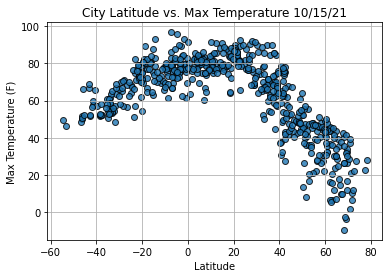

In [12]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()



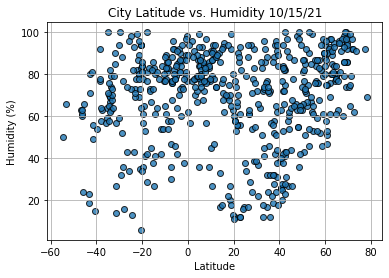

In [13]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()


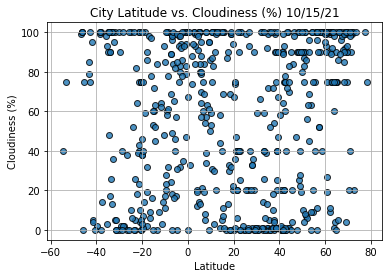

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


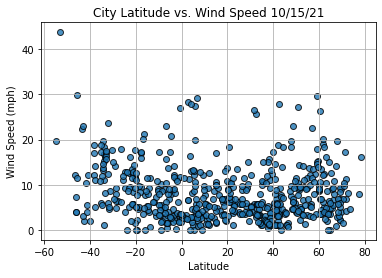

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()
